# Importing relevant libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

np.random.seed(0)

# Dataset Exploration

In [ ]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #X and Y are the input and target arrays respectively

In [ ]:
#Printing the shape of our testing and training datasets

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Visualizing the Dataset

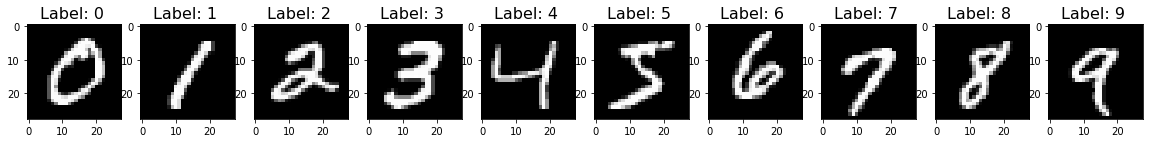

In [ ]:
numofclasses = 10 #since there are 10 digits - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
fig, axis = plt.subplots(1, numofclasses, figsize=(20,20))

#We try printing 1 sample digit image for each of our 10 classes from the MNIST dataset

for i in range(0, numofclasses):
  exampleimg = X_train[Y_train == i][0]
  axis[i].imshow(exampleimg, cmap='gray')
  axis[i].set_title("Label: {} ".format(i), fontsize=16)

In [ ]:
#Let us now print the first 20 digits in the target training dataset

for i in range(20):
  print(Y_train[i])

5
0
4
1
9
2
1
3
1
4
3
5
3
6
1
7
2
8
6
9


# One Hot Encoding

In [ ]:
Y_train = keras.utils.to_categorical(Y_train, numofclasses)
Y_test = keras.utils.to_categorical(Y_test, numofclasses)

In [ ]:
for i in range(20):
  print(Y_train[i])

#We can observe that there is a '1' in the 5th index position of the first array representing a 5 and similar representations
#corresponding to the Y_train values that were printed earlier

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Data Preprocessing

We need to **normalize** the dataset as the pixel values range from 0 to 255. Transforming the values to one in the range of 0 and 1 will help optimise the model’s learning algorithm like gradient descent. Having similar values will help the gradient descent algorithm reach the minima faster.

We need to reshape the dataset as currently it's a 3-dimensional dataset and we need to flatten the 28x28 dimensions of MNIST images into one dimension (value here = 784) so we can run it through a neural network

In [ ]:
#Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Reshaping of the Data

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)

(60000, 784)


# Building the Neural Network

We build a simple Neural Network model with 2 hidden layers. The first input layer has a ReLU activation function, the second layer is a hidden layer with ReLU activation as well, the third layer is a dropout layer (it drops 25% of the neurons to prevent overfitting) and finally the final layer has a softmax activation function that assigns probabilities to classes.

We compile the model and use a categorical cross entropy loss function for the same which is the most common loss function used in these models. The optimizer is an Adam optimizer, again most suited for such tasks and models and our model metric is accuracy.

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


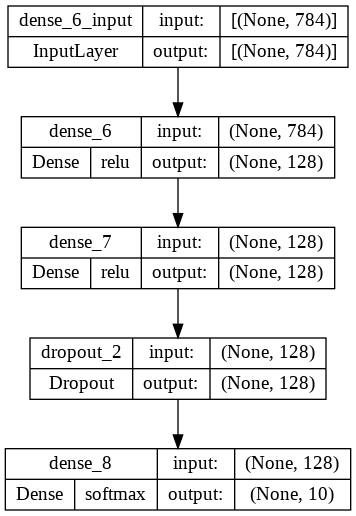

In [ ]:
# from keras.utils import to_categorical, plot_model

# plot_model(model, to_file='mlp-mnist.png', show_shapes=True, show_layer_activations=True)

In [ ]:
!pip install pydot
!pip install pydot_ng
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plot-model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Training

In [ ]:
batch_size = 512
num_epochs=10

#We will now train our model on the training and target datasets according to the chosen batch size
#as well as number of epochs defined

model.fit(x=X_train, y=Y_train, batch_size=batch_size, epochs=num_epochs)

Epoch 1/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4373 - accuracy: 0.8700
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4386 - accuracy: 0.8697
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4308 - accuracy: 0.8716
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4279 - accuracy: 0.8724
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4212 - accuracy: 0.8740
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4208 - accuracy: 0.8741
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4185 - accuracy: 0.8755
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4153 - accuracy: 0.8776
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4115 - accuracy: 0.8787
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4109 - accura

# Evaluation

Let us print the acccuracy and loss of the model on the test set to evaluate its competence

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 5ms/step - loss: 0.0649 - accuracy: 0.9787
Test Loss: 0.06489930301904678, Test Accuracy: 0.9786999821662903


In [ ]:
#Here we print the prediction probabilities to see how the model assigns probabilities to various classes for an image and then
#predicts a class for it on the basis of the class assigned the highest probability

Y_pred = model.predict(X_test)
Ypredclasses = np.argmax(Y_pred, axis=1)
print(Y_pred)
print(Ypredclasses)

313/313 [==============================] - 1s 2ms/step
[[3.26783374e-05 6.20462697e-06 1.74659421e-04 ... 9.91957784e-01
  5.04074596e-05 4.53438796e-03]
 [1.16460964e-04 2.00949400e-03 9.66682971e-01 ... 1.86005323e-07
  5.73653029e-03 1.01099591e-08]
 [3.44161748e-07 9.83441949e-01 7.83394836e-03 ... 1.81399682e-03
  1.81716017e-03 2.29613972e-04]
 ...
 [9.19465856e-06 1.36695802e-03 2.94597587e-04 ... 4.29847231e-03
  3.78540903e-02 4.21533644e-01]
 [3.94385960e-03 1.14098145e-03 8.88468407e-04 ... 1.87847818e-05
  1.91796795e-01 1.09215081e-03]
 [1.56269045e-04 1.23255887e-07 2.11070408e-03 ... 2.13078177e-09
  5.17977351e-05 6.13131988e-07]]
[7 2 1 ... 4 5 6]


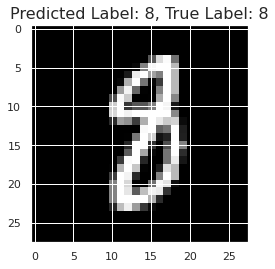

In [ ]:
#We want to print the correct prediction of the model for any given image in the dataset as well as visualise what the image looks like

idrand = np.random.choice(len(X_test))
X_example = X_test[idrand]
Y_true = np.argmax(Y_test, axis=1)
Y_example_true = Y_true[idrand]
Y_example_pred_class = Ypredclasses[idrand]

plt.title("Predicted Label: {}, True Label: {}".format(Y_example_pred_class, Y_example_true), fontsize=16)
plt.imshow(X_example.reshape(28, 28), cmap='gray')

# Confusion Matrix

Text(66.5, 0.5, 'True Label')

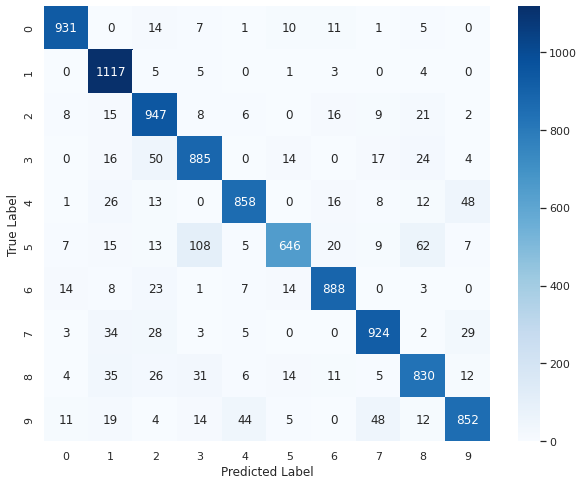

In [ ]:
confmatrix = confusion_matrix(Y_true, Ypredclasses)

#Let us now plot the confusion matrix for this model
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(confmatrix, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Checking Erroneous Predictions

It is essential for us to also check erroneous predictions made by our model as well as visualise them to see what kind of images the model is confused by

In [ ]:
num_errors = (Ypredclasses - Y_true != 0) #this stores the number of erroneous predictions the model made
Ypredclasserrors = Ypredclasses[num_errors]
Yprederrors = Y_pred[num_errors]
Ytrueerrors = Y_true[num_errors]
Xtesterrors = X_test[num_errors]

In [ ]:
Yprederrorsprob = np.max(Yprederrors, axis=1)
true_prob_errors = np.diagonal(np.take(Yprederrors, Ytrueerrors, axis=1))
diffpredtrueerrors = Yprederrorsprob - true_prob_errors

# We want to obtain the list of indices of sorted differences
sorteddifferrorsid = np.argsort(diffpredtrueerrors)
errorsidlist = sorteddifferrorsid[-5:] # Storing last 5 erroneous predictions

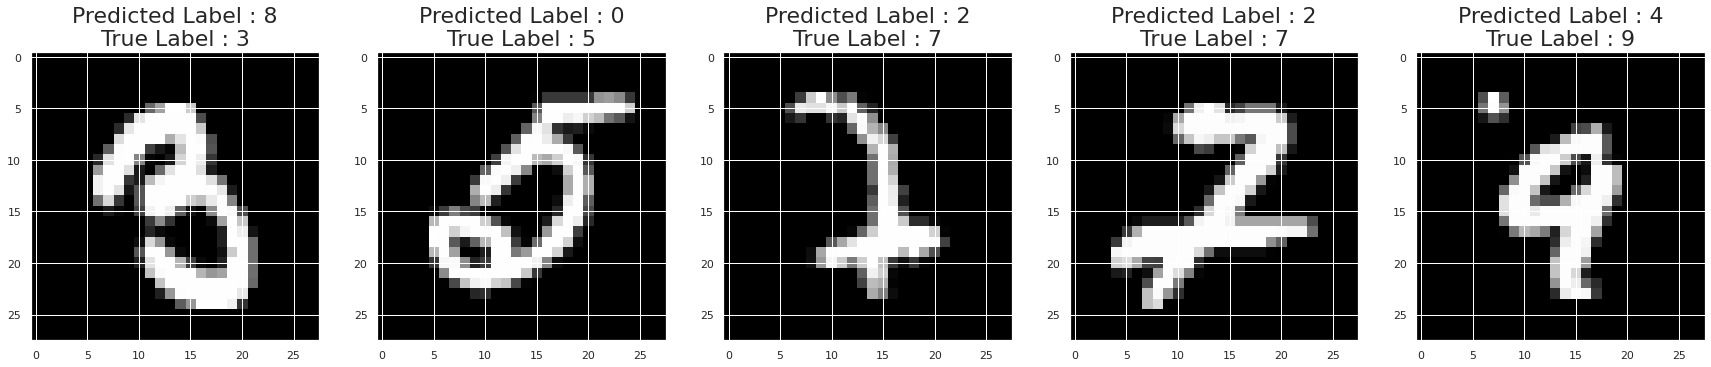

In [ ]:
# Visualisation
num = len(errorsidlist)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  index = errorsidlist[i]
  sample = Xtesterrors[index].reshape(28,28)
  Y_t = Ytrueerrors[index]
  Y_p = Ypredclasserrors[index]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted Label : {}\nTrue Label : {}".format(Y_p, Y_t), fontsize=22)

# Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
folds = 5 # We are performing 5-fold cross validation

In [ ]:
# Normalization of data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# We will define containers that will store scores for every fold.
# Scores includes both the accuracy of the model as well as loss per fold

accfold = []
lossfold = []

In [ ]:
# Merging the inputs and targets arrays

inputarr = np.concatenate((X_train, X_test), axis=0)
targetarr = np.concatenate((Y_train, Y_test), axis=0)

In [ ]:
k_fold_valid = KFold(n_splits=folds, shuffle=True)

In [ ]:
# Evaluation of a 5-fold Cross Validation model

curr_fold = 1

for train, test in k_fold_valid.split(inputarr, targetarr):

  print('------------------------------------------------------------------------')
  print(f'Training neural network for fold {curr_fold} ...')

  # Fit the data to our model according to specifications

  history = model.fit(inputarr[train], targetarr[train],
              batch_size=batch_size,
              epochs=num_epochs)

  # Now we generate our generalization metrics and store the scores of the model for all folds

  scores = model.evaluate(inputarr[test], targetarr[test], verbose=0)
  print(f'Score for fold {curr_fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  accfold.append(scores[1] * 100)
  lossfold.append(scores[0])

  # Increment the current fold index

  curr_fold = curr_fold + 1

------------------------------------------------------------------------
Training neural network for fold 1 ...
Epoch 1/15
110/110 [==============================] - 1s 11ms/step - loss: 2.3951 - accuracy: 0.1284
Epoch 2/15
110/110 [==============================] - 1s 11ms/step - loss: 2.2779 - accuracy: 0.1447
Epoch 3/15
110/110 [==============================] - 1s 11ms/step - loss: 2.2757 - accuracy: 0.1499
Epoch 4/15
110/110 [==============================] - 2s 18ms/step - loss: 2.2738 - accuracy: 0.1522
Epoch 5/15
110/110 [==============================] - 2s 17ms/step - loss: 2.2707 - accuracy: 0.1565
Epoch 6/15
110/110 [==============================] - 1s 11ms/step - loss: 2.2676 - accuracy: 0.1632
Epoch 7/15
110/110 [==============================] - 2s 16ms/step - loss: 2.2642 - accuracy: 0.1643
Epoch 8/15
110/110 [==============================] - 2s 16ms/step - loss: 2.2581 - accuracy: 0.1745
Epoch 9/15
110/110 [==============================] - 1s 11ms/step - loss: 2.249

In [ ]:
accfold

[89.40714001655579,
 93.07143092155457,
 95.36428451538086,
 96.49999737739563,
 97.45000004768372]

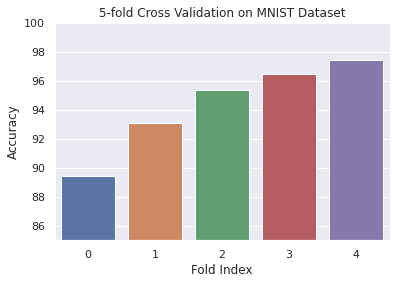

In [ ]:
sns.set()

bar = sns.barplot(x=np.array([0,1,2,3,4]),y=accfold)
bar.set_ylim([85,100])
bar.set_title("5-fold Cross Validation on MNIST Dataset")
bar.set_ylabel("Accuracy")
_= bar.set_xlabel("Fold Index")

In [ ]:
loss, acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9790


In [ ]:
# fig, ax = plt.subplots(1,2, figsize = (18,6))
# ax[0].plot(history.history['loss'], label="Training Loss")
# ax[0].plot(history.history['val_loss'], label="val Loss")

# legend = ax[0].legend(loc='best', shadow=True)

# ax[1].plot(history.history['accuracy'], label="Training Accuracy")
# ax[1].plot(history.history['val_accuracy'], label="Val Accuracy")

# legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
history.history

{'loss': [0.5755024552345276,
  0.5601483583450317,
  0.5605133771896362,
  0.5339174270629883,
  0.528952956199646,
  0.5298839807510376,
  0.5138298869132996,
  0.5178110003471375,
  0.5098416805267334,
  0.49681875109672546,
  0.4921988248825073,
  0.49482738971710205,
  0.4817635715007782,
  0.47713595628738403,
  0.48350951075553894],
 'accuracy': [0.8266071677207947,
  0.8344643115997314,
  0.8322142958641052,
  0.8431428670883179,
  0.8438571691513062,
  0.8417321443557739,
  0.8476071357727051,
  0.8460000157356262,
  0.8469464182853699,
  0.8538214564323425,
  0.8550357222557068,
  0.8525893092155457,
  0.8566785454750061,
  0.8573750257492065,
  0.8548571467399597]}

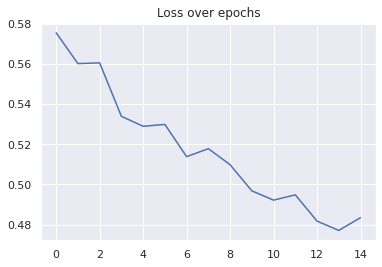

In [ ]:
_ = sns.lineplot(y=history.history['loss'], x=range(15))
_ = plt.title("Loss over epochs")

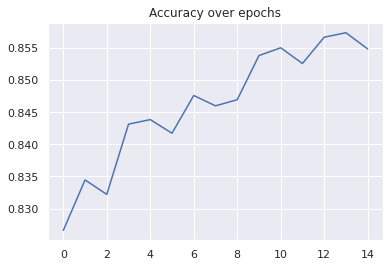

In [ ]:
_ = sns.lineplot(y=history.history['accuracy'], x=range(15))
_ = plt.title("Accuracy over epochs")